In [2]:
from astropy.coordinates import SkyCoord
from astropy.io import ascii
from astropy.io import fits
from astropy.table import Column
from astroquery.mast import Tesscut
from lightkurve import TessTargetPixelFile, TessQualityFlags, TessLightCurve, LombScarglePeriodogram
from lightkurve import search_targetpixelfile, search_tesscut, TessLightCurveFile
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
from random import randint, sample

Text(0.5, 1.0, 'Light Curve w/ sigma clip=2.5')

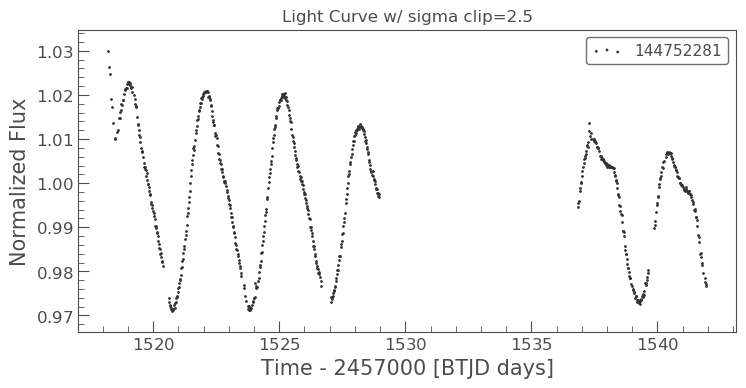

In [21]:
# Import and plot Light Curve 
lc = TessLightCurveFile('DataOutput/LightCurves/TESS_LC_144752281_SEC8.fits').get_lightcurve('FLUX')
lc.remove_outliers(sigma=2.5).scatter()
plt.title('Light Curve w/ sigma clip=2.5')

Text(0.5, 1.0, 'Periodogram')

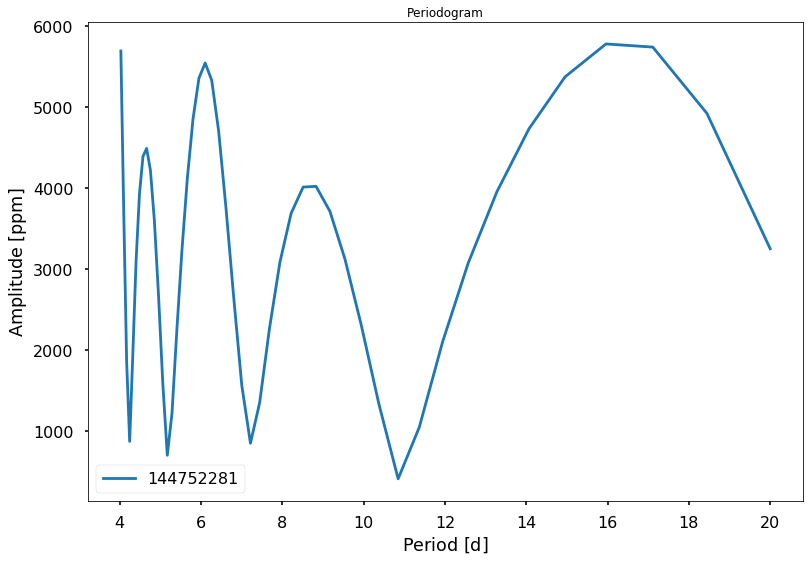

In [22]:
# num_terms is the number of terms for which the fourier expansion is done (how complex are the oscillations?)
num_terms = 1
# Min_period is the minimum detectable period
min_period = 4.
# max_period is the maximum detectable period
max_period = 20.

ov_sampling = 10

# Get periodogram of clean light curve using the defined parameters & then plot it!
pg = lc.remove_outliers(sigma=2.5).to_periodogram(method='lombscargle', minimum_period=min_period, maximum_period=max_period,
                                                nterms=num_terms, oversample_factor=ov_sampling)
ax = pg.plot(scale='linear', view='period', style=plt.style.available[-2])
plt.title('Periodogram')

In [18]:
# Top 10 periodic signals detected
pg.period[pg.power.argsort()][-10:]

<Quantity [14.06679921,  5.80321114, 18.44410152,  6.26312268,  5.94882177,
           14.95405321,  6.10192762,  4.02835723, 17.11281163, 15.96076804] d>

Text(0.5, 1.0, 'Folded Light Curve using period=6.10')

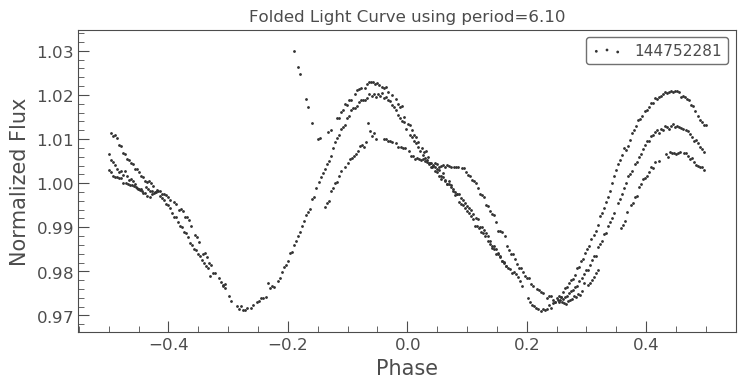

In [23]:
# I think actual period is a bit above 6 days.
lc.remove_outliers(sigma=2.5).fold(period=6.1019276).scatter()
plt.title('Folded Light Curve using period=6.10')